### Start the Project 

In [8]:
!python --version

Python 3.8.10


In [9]:
### import Library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler

### Data Gathering 

In [10]:
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 3. EDA

In [11]:
### duplicate Values 

df.duplicated().sum()

0

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing values 

In [16]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Gender >> MODE
# Married >> MODE
# Dependents >> Mode
# Self_Employed >> mode
# LoanAmount >> mean
# Loan_Amount_Term >> mean
# Credit_History >> median

#### 
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace= True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace= True)



In [18]:
# ### RAM 8 GB

# # data >> 10 GB

# df = pd.read_csv('loan.csv', chunksize=5)
# df

# for i in df:
#     print(i)

### Data Types 

In [19]:
#  0   Loan_ID            614 non-null    object >> Delete
#  1   Gender             601 non-null    object 
#  2   Married            611 non-null    object 
#  3   Dependents         599 non-null    object 
#  4   Education          614 non-null    object 
#  5   Self_Employed      582 non-null    object 
# 11  Property_Area      614 non-null    object 
# 12  Loan_Status        614 non-null    object 

df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['Married'].replace({'Yes': 1, 'No': 0}, inplace=True)


In [20]:
def check_vc(feature_name):
    return df[feature_name].value_counts().to_dict()
    
# print(check_vc('Gender'))
print(check_vc('Dependents'))
print(check_vc('Education'))
print(check_vc('Self_Employed'))
print(check_vc('Property_Area'))
print(check_vc('Loan_Status'))
# print(check_vc('Dependents'))


{'0': 360, '1': 102, '2': 101, '3+': 51}
{'Graduate': 480, 'Not Graduate': 134}
{'No': 532, 'Yes': 82}
{'Semiurban': 233, 'Urban': 202, 'Rural': 179}
{'Y': 422, 'N': 192}


In [21]:
def impute(feature_name,**kwargs):
    
    df[feature_name].replace(kwargs, inplace=True)
# impute('Gender',Male= 0, Female = 1)

impute('Self_Employed',Yes= 1, No = 0)
impute('Property_Area',Semiurban=1, Urban=2, Rural=0)
impute('Loan_Status',N= 0, Y = 1)



In [22]:
df['Dependents'].replace({'3+':3}, inplace=True)

In [23]:
df['Dependents'] = df['Dependents'].astype(int)

In [24]:
df['Education'].replace({'Graduate':1, 'Not Graduate': 0}, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 60.1+ KB


### check the outlier 

<AxesSubplot: >

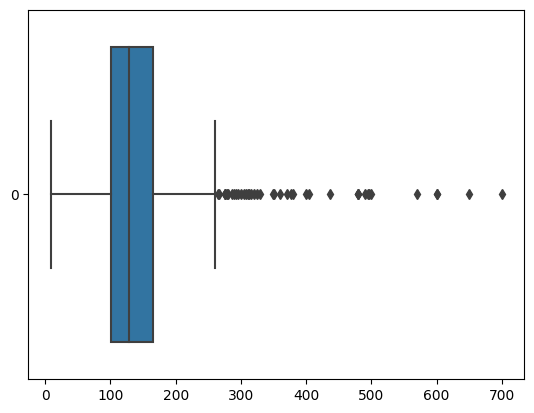

In [26]:
sns.boxplot(df['LoanAmount'], orient = "h")

<AxesSubplot: >

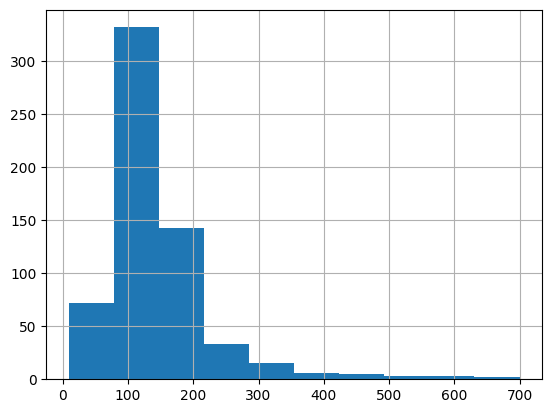

In [27]:
df['LoanAmount'].hist()

<AxesSubplot: >

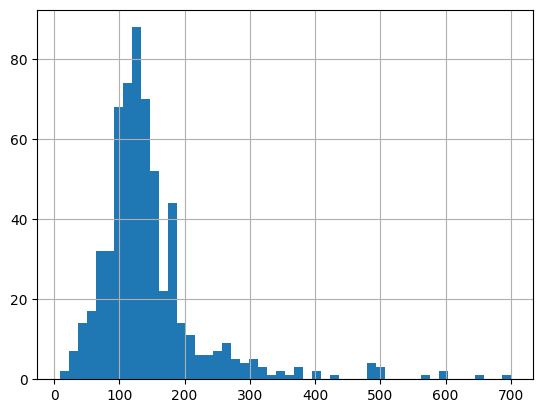

In [28]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot: >

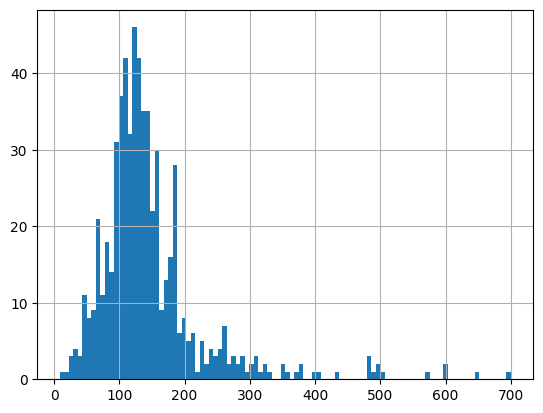

In [29]:
df['LoanAmount'].hist(bins=100)

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

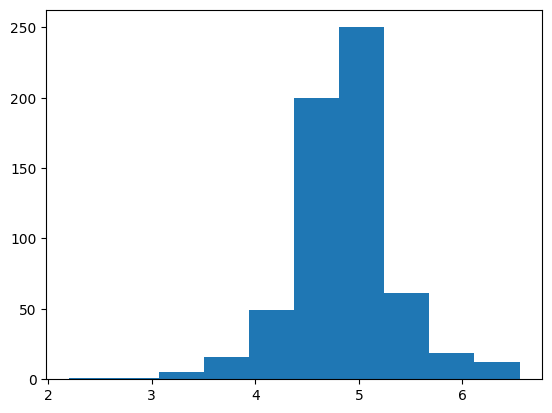

In [30]:
plt.hist(np.log(df['LoanAmount']))

In [31]:
df['log_LoanAmount'] = np.log(df['LoanAmount'])

<AxesSubplot: >

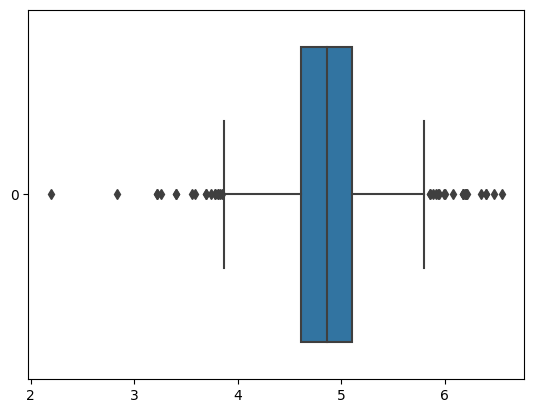

In [32]:
sns.boxplot(df['log_LoanAmount'], orient = "h")

<AxesSubplot: xlabel='log_LoanAmount', ylabel='Density'>

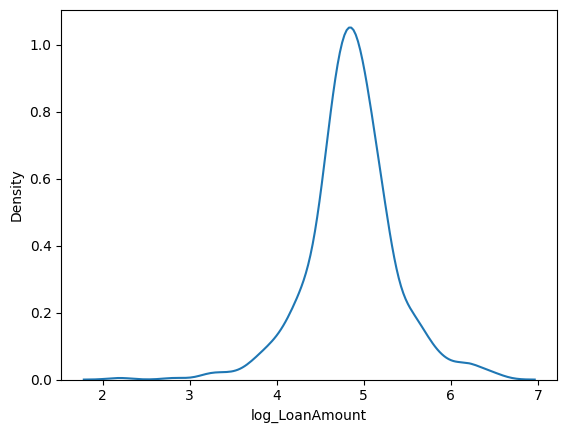

In [33]:
sns.kdeplot(df['log_LoanAmount'])

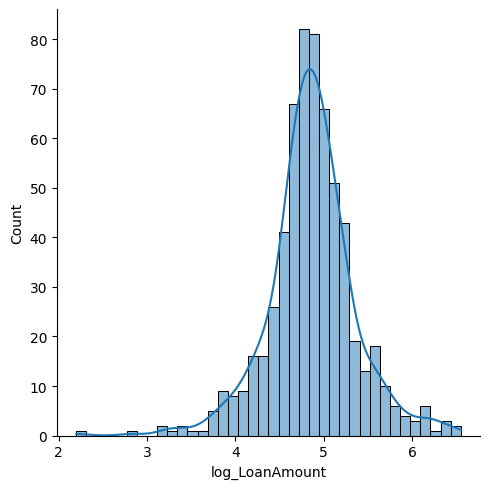

In [34]:
sns.displot(df['log_LoanAmount'], kde= True)

### Hypothesis Testing 

In [35]:
h0 == log_loanAmount is normally distributed.



SyntaxError: invalid syntax (3497389713.py, line 1)

In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109


In [37]:
df['totalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [38]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0


(array([  7.,  53., 186., 205.,  91.,  41.,  20.,   4.,   5.,   2.]),
 array([ 7.27378632,  7.67662813,  8.07946994,  8.48231175,  8.88515356,
         9.28799538,  9.69083719, 10.093679  , 10.49652081, 10.89936262,
        11.30220443]),
 <BarContainer object of 10 artists>)

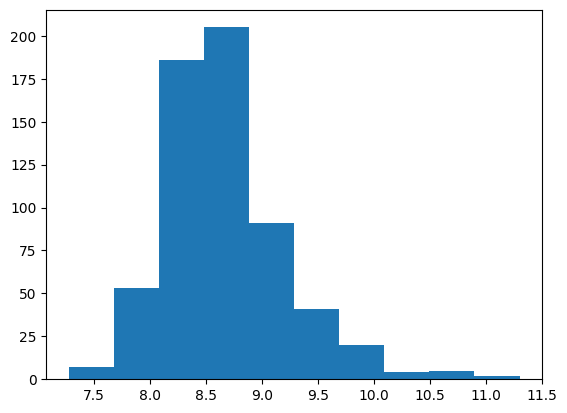

In [39]:
plt.hist(np.log(df['totalIncome']))

<AxesSubplot: >

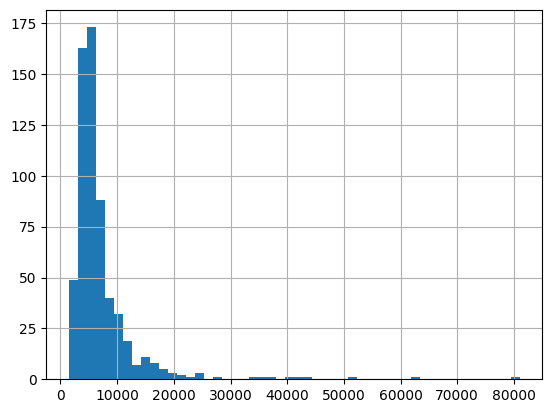

In [40]:
df['totalIncome'].hist(bins=50)

In [41]:
df['log_totalIncome'] = np.log(df['totalIncome'])

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome,log_totalIncome
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


### Feature Selection 

In [43]:
delete_features = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount', 'totalIncome']
df.drop(columns = delete_features, axis=1, inplace=True)


In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_totalIncome
0,0,0,0,1,0,360.0,1.0,2,1,4.986426,8.674026
1,0,1,1,1,0,360.0,1.0,0,0,4.852030,8.714568
2,0,1,0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,0,1,0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,0,0,0,1,0,360.0,1.0,2,1,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,360.0,1.0,0,1,4.262680,7.972466
610,0,1,3,1,0,180.0,1.0,0,1,3.688879,8.320205
611,0,1,1,1,0,360.0,1.0,2,1,5.533389,9.025456
612,0,1,2,1,0,360.0,1.0,2,1,5.231109,8.933664


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    int64  
 8   Loan_Status       614 non-null    int64  
 9   log_LoanAmount    614 non-null    float64
 10  log_totalIncome   614 non-null    float64
dtypes: float64(4), int32(1), int64(6)
memory usage: 50.5 KB


In [46]:
1. Filter Methods 
2. Wrapper Methods 
3. Emebedded Methods 

SyntaxError: invalid syntax (2301167474.py, line 1)

In [47]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_totalIncome
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,0.073567,-0.009170,0.025752,-0.017987,-0.144378,-0.167285
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,-0.100863,0.010938,0.004257,0.091478,0.180178,0.151527
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,-0.101054,-0.040160,-0.000244,0.010118,0.156391,0.112812
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.077242,0.073658,0.065243,0.085884,0.143367,0.204861
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,-0.033943,-0.001550,-0.030860,-0.003700,0.109629,0.176709
Loan_Amount_Term,0.073567,-0.100863,-0.101054,0.077242,-0.033943,1.000000,0.000432,-0.077620,-0.020974,0.086531,-0.055320
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,0.000432,1.000000,0.001963,0.540556,-0.019542,0.020791
Property_Area,0.025752,0.004257,-0.000244,0.065243,-0.030860,-0.077620,0.001963,1.000000,0.032112,-0.092798,-0.046246
Loan_Status,-0.017987,0.091478,0.010118,0.085884,-0.003700,-0.020974,0.540556,0.032112,1.000000,-0.041874,0.007240
log_LoanAmount,-0.144378,0.180178,0.156391,0.143367,0.109629,0.086531,-0.019542,-0.092798,-0.041874,1.000000,0.657507


<AxesSubplot: >

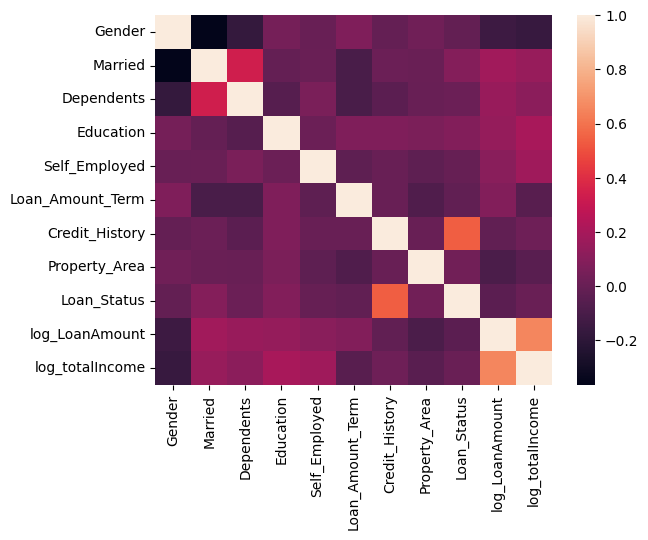

In [48]:
sns.heatmap(df.corr())

<AxesSubplot: >

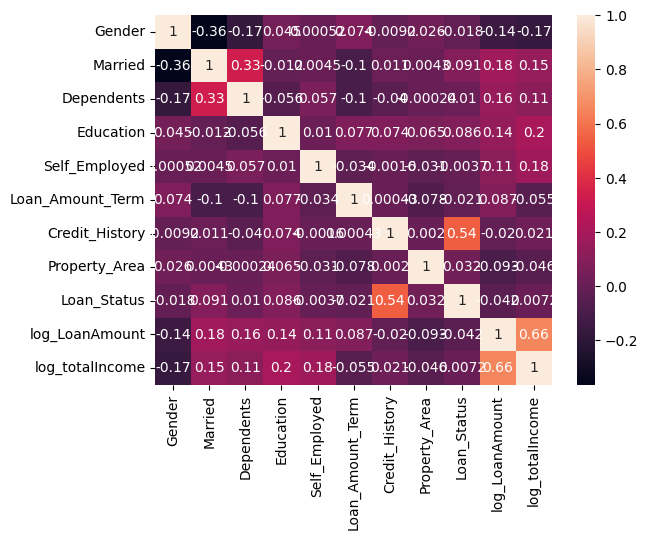

In [49]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

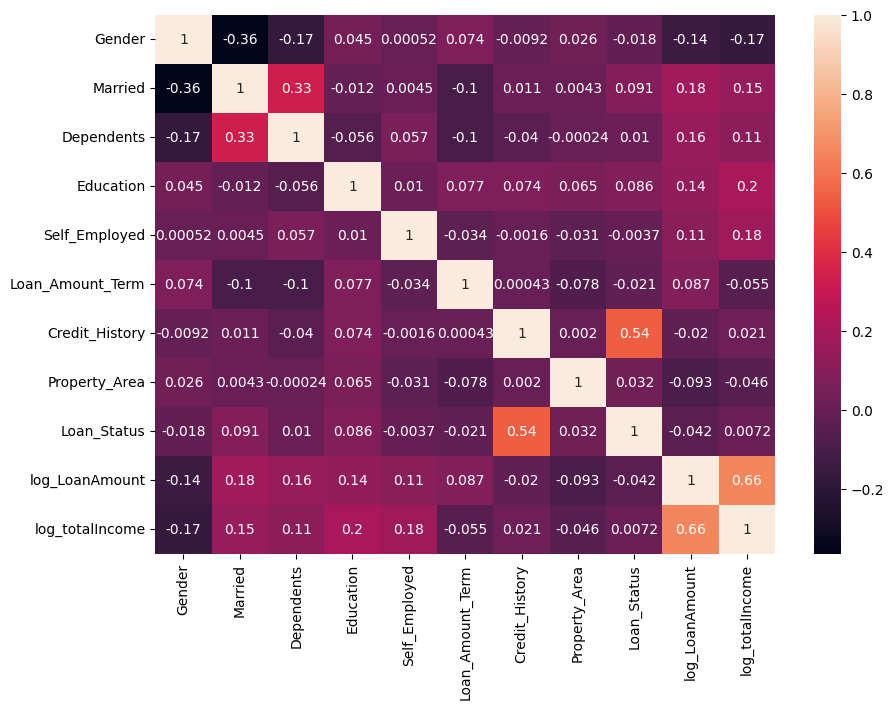

In [50]:
plt.figure(figsize= (10,7))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

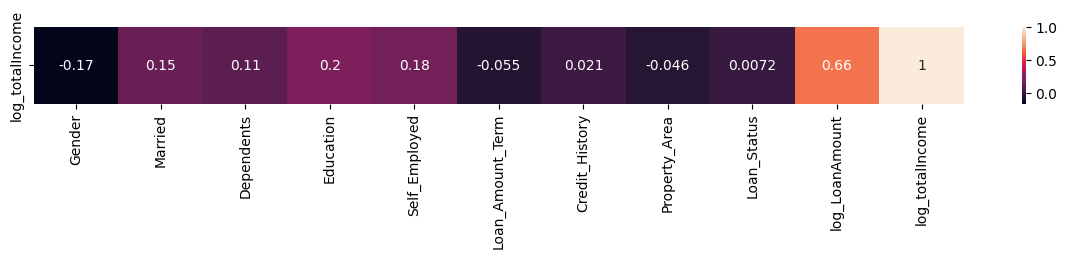

In [51]:
plt.figure(figsize= (15,1))
sns.heatmap(df.corr().tail(1), annot=True)

In [52]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_LoanAmount', 'log_totalIncome'],
      dtype='object')

In [53]:
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'log_LoanAmount', 'log_totalIncome','Loan_Status']]

<AxesSubplot: >

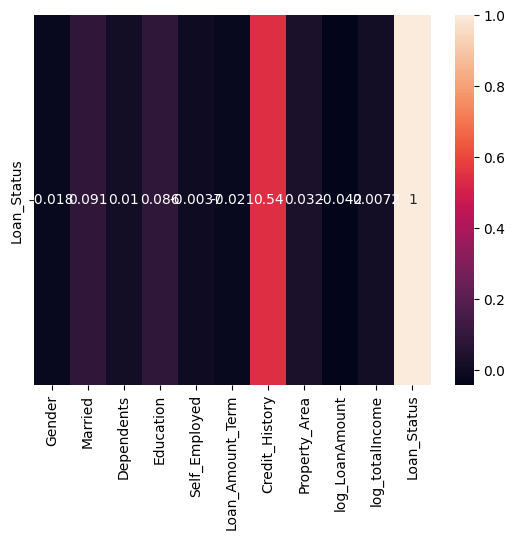

In [54]:
sns.heatmap(df.corr().tail(1), annot=True)

In [55]:
df['Loan_Status'].value_counts()


1    422
0    192
Name: Loan_Status, dtype: int64

In [56]:
### Balance the Data 
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

smote = SMOTE(k_neighbors=6,sampling_strategy=0.9)
x_smote,y_smote = smote.fit_resample(x,y)
x_smote.shape,y_smote.shape 

((801, 10), (801,))

In [57]:
y_smote.value_counts()

1    422
0    379
Name: Loan_Status, dtype: int64

In [58]:
379/422

0.8981042654028436

In [59]:
x_smote.shape,y_smote.shape 

((801, 10), (801,))

### Model Training 

In [60]:
### Split the data 

x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote, test_size=0.25,
                                                 random_state=12, stratify=y_smote)


In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((600, 10), (201, 10), (600,), (201,))

In [62]:
### Logistic Regression 

model = LogisticRegression()
model.fit(x_train,y_train)
### Prediction on test data
y_pred = model.predict(x_test)

### Model Evaluation on Test data 
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score= {acc}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix = \n{cm}")

cr = classification_report(y_test, y_pred)
print(f"Classification Report = \n{cr}")

Accuracy Score= 0.7164179104477612
Confusion Matrix = 
[[53 42]
 [15 91]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        95
           1       0.68      0.86      0.76       106

    accuracy                           0.72       201
   macro avg       0.73      0.71      0.71       201
weighted avg       0.73      0.72      0.71       201



C:\Users\Shridhar\.conda\envs\loan\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
def model_train(model, x, y):
    model_ob = model
    return model_ob.fit(x,y)

def model_eval(data,actual,model):
    
    y_pred = model.predict(data)

    ### Model Evaluation on Test data 
    acc = accuracy_score(actual,y_pred)
    print(f"Accuracy Score= {acc}")

    cm = confusion_matrix(actual, y_pred)
    print(f"Confusion Matrix = \n{cm}")

    cr = classification_report(actual, y_pred)
    print(f"Classification Report = \n{cr}")
    
    return acc 
    
model = LogisticRegression()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)
result = test_acc-train_acc
result

Accuracy Score= 0.7164179104477612
Confusion Matrix = 
[[53 42]
 [15 91]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        95
           1       0.68      0.86      0.76       106

    accuracy                           0.72       201
   macro avg       0.73      0.71      0.71       201
weighted avg       0.73      0.72      0.71       201

Accuracy Score= 0.735
Confusion Matrix = 
[[159 125]
 [ 34 282]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.82      0.56      0.67       284
           1       0.69      0.89      0.78       316

    accuracy                           0.73       600
   macro avg       0.76      0.73      0.72       600
weighted avg       0.75      0.73      0.73       600



C:\Users\Shridhar\.conda\envs\loan\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.018582089552238834

In [64]:
### KNN 

model = KNeighborsClassifier()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7313432835820896
Confusion Matrix = 
[[68 27]
 [27 79]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        95
           1       0.75      0.75      0.75       106

    accuracy                           0.73       201
   macro avg       0.73      0.73      0.73       201
weighted avg       0.73      0.73      0.73       201

Accuracy Score= 0.8083333333333333
Confusion Matrix = 
[[230  54]
 [ 61 255]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       284
           1       0.83      0.81      0.82       316

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [65]:
### Decision Tree

model = DecisionTreeClassifier(random_state=5)
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7611940298507462
Confusion Matrix = 
[[72 23]
 [25 81]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        95
           1       0.78      0.76      0.77       106

    accuracy                           0.76       201
   macro avg       0.76      0.76      0.76       201
weighted avg       0.76      0.76      0.76       201

Accuracy Score= 1.0
Confusion Matrix = 
[[284   0]
 [  0 316]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       316

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [66]:
1. Hyperparameter Tuning 
2. Pruning 
3. Use Ensemble Methods 

SyntaxError: invalid syntax (3526893770.py, line 1)

In [67]:
model = DecisionTreeClassifier(random_state=5)

hyp = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
    
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
rscv.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'gini'}

In [78]:
model = DecisionTreeClassifier(random_state=5)

hyp = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
hyp_model = rscv.best_estimator_
hyp_model.fit(x_train,y_train)

y_pred = hyp_model.predict(x_test)

### Model Evaluation on Test data 
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score= {acc}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix = \n{cm}")

cr = classification_report(y_test, y_pred)
print(f"Classification Report = \n{cr}")

test_acc = model_eval(x_test, y_test,hyp_model)
train_acc = model_eval(x_train, y_train,hyp_model)

Accuracy Score= 0.746268656716418
Confusion Matrix = 
[[ 48  47]
 [  4 102]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.92      0.51      0.65        95
           1       0.68      0.96      0.80       106

    accuracy                           0.75       201
   macro avg       0.80      0.73      0.73       201
weighted avg       0.80      0.75      0.73       201

Accuracy Score= 0.746268656716418
Confusion Matrix = 
[[ 48  47]
 [  4 102]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.92      0.51      0.65        95
           1       0.68      0.96      0.80       106

    accuracy                           0.75       201
   macro avg       0.80      0.73      0.73       201
weighted avg       0.80      0.75      0.73       201

Accuracy Score= 0.74
Confusion Matrix = 
[[137 147]
 [  9 307]]
Classification Report = 
              precision    recall  f1-score   support

In [69]:
[[69 26]
 [22 84]]

[[48 47]
 [ 7 99]]

[[ 49  46]
 [  4 102]]

SyntaxError: invalid syntax (3571745785.py, line 1)

In [70]:
### Random Forest Algo

model = RandomForestClassifier(random_state=5)
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.8258706467661692
Confusion Matrix = 
[[75 20]
 [15 91]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        95
           1       0.82      0.86      0.84       106

    accuracy                           0.83       201
   macro avg       0.83      0.82      0.82       201
weighted avg       0.83      0.83      0.83       201

Accuracy Score= 1.0
Confusion Matrix = 
[[284   0]
 [  0 316]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       316

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [71]:
model = RandomForestClassifier(random_state=5)

hyp = {
     'n_estimators':np.arange(50,300,10),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
hyp_model = rscv.best_estimator_
hyp_model.fit(x_train,y_train)

# y_pred = hyp_model.predict(x_test)

# ### Model Evaluation on Test data 
# acc = accuracy_score(y_test,y_pred)
# print(f"Accuracy Score= {acc}")

# cm = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix = \n{cm}")

# cr = classification_report(y_test, y_pred)
# print(f"Classification Report = \n{cr}")

test_acc = model_eval(x_test, y_test,hyp_model)
train_acc = model_eval(x_train, y_train,hyp_model)

Accuracy Score= 0.7611940298507462
Confusion Matrix = 
[[ 50  45]
 [  3 103]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.94      0.53      0.68        95
           1       0.70      0.97      0.81       106

    accuracy                           0.76       201
   macro avg       0.82      0.75      0.74       201
weighted avg       0.81      0.76      0.75       201

Accuracy Score= 0.7616666666666667
Confusion Matrix = 
[[146 138]
 [  5 311]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.97      0.51      0.67       284
           1       0.69      0.98      0.81       316

    accuracy                           0.76       600
   macro avg       0.83      0.75      0.74       600
weighted avg       0.82      0.76      0.75       600



In [72]:
### Adaboost Algo

model = AdaBoostClassifier(random_state=5)
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.746268656716418
Confusion Matrix = 
[[60 35]
 [16 90]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        95
           1       0.72      0.85      0.78       106

    accuracy                           0.75       201
   macro avg       0.75      0.74      0.74       201
weighted avg       0.75      0.75      0.74       201

Accuracy Score= 0.8133333333333334
Confusion Matrix = 
[[201  83]
 [ 29 287]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       284
           1       0.78      0.91      0.84       316

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.82      0.81      0.81       600



In [73]:
### Naive Bayes Algo

model = GaussianNB()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7014925373134329
Confusion Matrix = 
[[ 40  55]
 [  5 101]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.89      0.42      0.57        95
           1       0.65      0.95      0.77       106

    accuracy                           0.70       201
   macro avg       0.77      0.69      0.67       201
weighted avg       0.76      0.70      0.68       201

Accuracy Score= 0.7233333333333334
Confusion Matrix = 
[[124 160]
 [  6 310]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.95      0.44      0.60       284
           1       0.66      0.98      0.79       316

    accuracy                           0.72       600
   macro avg       0.81      0.71      0.69       600
weighted avg       0.80      0.72      0.70       600



In [74]:
### Naive Bayes Algo

model = MultinomialNB()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.6318407960199005
Confusion Matrix = 
[[45 50]
 [24 82]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.65      0.47      0.55        95
           1       0.62      0.77      0.69       106

    accuracy                           0.63       201
   macro avg       0.64      0.62      0.62       201
weighted avg       0.64      0.63      0.62       201

Accuracy Score= 0.6666666666666666
Confusion Matrix = 
[[152 132]
 [ 68 248]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       284
           1       0.65      0.78      0.71       316

    accuracy                           0.67       600
   macro avg       0.67      0.66      0.66       600
weighted avg       0.67      0.67      0.66       600



In [75]:
### Naive Bayes Algo

model = BernoulliNB()
model_obj = model_train(model,x_train,y_train)
test_acc = model_eval(x_test, y_test,model_obj)
train_acc = model_eval(x_train, y_train,model_obj)

Accuracy Score= 0.7014925373134329
Confusion Matrix = 
[[53 42]
 [18 88]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        95
           1       0.68      0.83      0.75       106

    accuracy                           0.70       201
   macro avg       0.71      0.69      0.69       201
weighted avg       0.71      0.70      0.70       201

Accuracy Score= 0.6983333333333334
Confusion Matrix = 
[[143 141]
 [ 40 276]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.78      0.50      0.61       284
           1       0.66      0.87      0.75       316

    accuracy                           0.70       600
   macro avg       0.72      0.69      0.68       600
weighted avg       0.72      0.70      0.69       600



In [76]:
import xgboost as xgb

TypeError: 'module' object is not callable

In [ ]:
Model                 train_Acc Test_acc Time_complexity
Logistic Regression    71         69

In [ ]:
Select The optimised Model 

In [ ]:
## User Test 

API & Test API


front End 


Deployemnt 

In [ ]:
Test Train
71     73 LR
73     80 KNN
76     100 DT
74     74 DT-HYP
82     100 Rf
76     76 RF- Hyp
74     81 ADAbOOst
---------------

76     76 RF- Hyp
91     91  --- RF - Hyp -- Final model for Deployment 

In [79]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome,Loan_Status
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1


In [80]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'log_LoanAmount',
       'log_totalIncome', 'Loan_Status'],
      dtype='object')

In [81]:
model = RandomForestClassifier(random_state=5)

hyp = {
     'n_estimators':np.arange(50,300,10),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,5),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(2,5),
    'max_features': ["sqrt", "log2"]
}

rscv = RandomizedSearchCV(model,hyp, cv= 5)
rscv.fit(x_train,y_train)
hyp_model = rscv.best_estimator_
hyp_model.fit(x_train,y_train)

test_acc = model_eval(x_test, y_test,hyp_model)
train_acc = model_eval(x_train, y_train,hyp_model)

Accuracy Score= 0.7661691542288557
Confusion Matrix = 
[[ 50  45]
 [  2 104]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.96      0.53      0.68        95
           1       0.70      0.98      0.82       106

    accuracy                           0.77       201
   macro avg       0.83      0.75      0.75       201
weighted avg       0.82      0.77      0.75       201

Accuracy Score= 0.76
Confusion Matrix = 
[[146 138]
 [  6 310]]
Classification Report = 
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       284
           1       0.69      0.98      0.81       316

    accuracy                           0.76       600
   macro avg       0.83      0.75      0.74       600
weighted avg       0.82      0.76      0.74       600



In [87]:
ui = df.head(1)
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome,Loan_Status
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1


In [88]:
ui.drop('Loan_Status', axis=1, inplace= True )
ui

C:\Users\Shridhar\AppData\Local\Temp\ipykernel_7000\2136240972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ui.drop('Loan_Status', axis=1, inplace= True )


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026


In [85]:
result = hyp_model.predict(ui)
result

array([1], dtype=int64)

In [89]:
import pickle
with open('model.pkl','wb') as file: 
    pickle.dump(hyp_model,file)

In [90]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_totalIncome,Loan_Status
0,0,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1
1,0,1,1,1,0,360.0,1.0,0,4.852030,8.714568,0
2,0,1,0,1,1,360.0,1.0,2,4.189655,8.006368,1
3,0,1,0,0,0,360.0,1.0,2,4.787492,8.505323,1
4,0,0,0,1,0,360.0,1.0,2,4.948760,8.699515,1
5,0,1,2,1,1,360.0,1.0,2,5.587249,9.170872,1
6,0,1,0,0,0,360.0,1.0,2,4.553877,8.255569,1
7,0,1,3,1,0,360.0,0.0,1,5.062595,8.619750,0
8,0,1,2,1,0,360.0,1.0,2,5.123964,8.618305,1
9,0,1,1,1,0,360.0,1.0,1,5.855072,10.077819,0
